In [35]:
import data_handler as dh
import visualization as viz
import spatial_features as spf
import game_state_representation as gsr
import pandas as pd
import numpy as np

In [36]:
FIELD_DIMEN = (105, 68)
DATA_DIR_single = '../bru_data/data/comp-4zwgbb66rif2spcoeeol2motx/tmcl-1qtpbdbeudho5i7fu5z2lp2j8/fx-4sekj9hgwxzq3y4ih9415239w'
DATA_DIR = '../bru_data/data/comp-4zwgbb66rif2spcoeeol2motx/tmcl-1qtpbdbeudho5i7fu5z2lp2j8'

event_data_single = dh.read_event_data(DATA_DIR_single)
# event_data = dh.read_dir_event_data(DATA_DIR)

(<Figure size 1200x800 with 1 Axes>, <AxesSubplot: >)

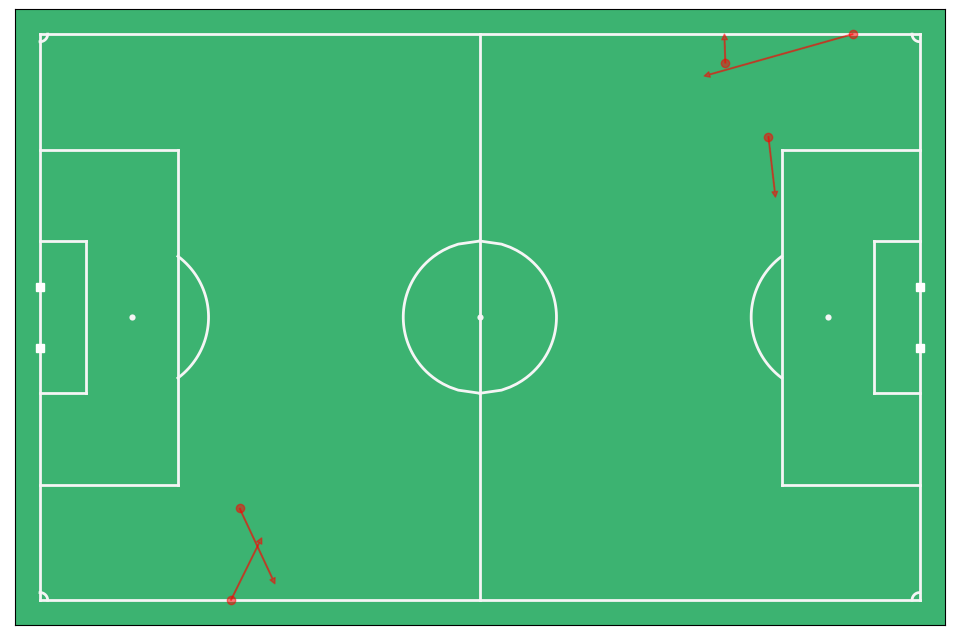

In [37]:
viz.plot_events(event_data_single.iloc[100:110], FIELD_DIMEN)

In [38]:
tracking_single = dh.read_tracking_data(DATA_DIR_single)

(<Figure size 1200x800 with 1 Axes>, <AxesSubplot: >)

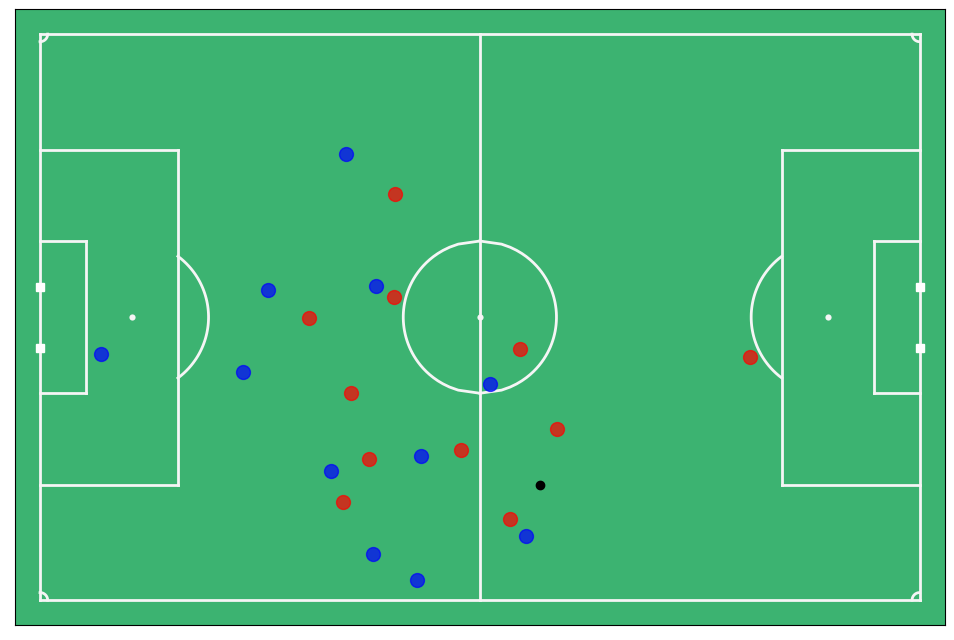

In [39]:
viz.plot_frame(tracking_single.iloc[2316], FIELD_DIMEN)

1.4504209733729072


(<Figure size 1200x800 with 1 Axes>, <AxesSubplot: >)

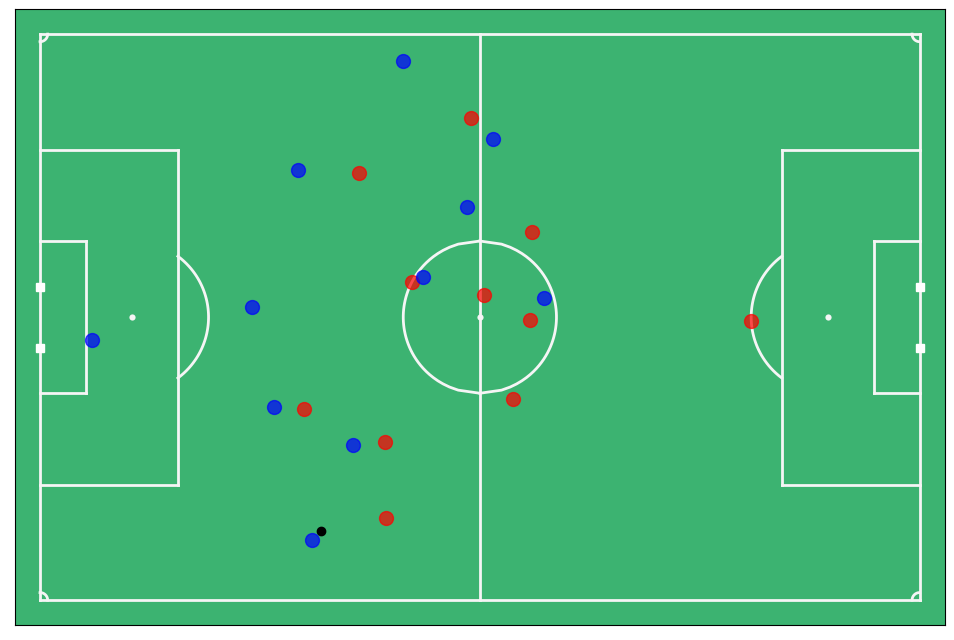

In [55]:
# passing_events = event_data_single[event_data_single['typeId'] == 1]
# pass_event = passing_events.iloc[119]
#
# match_period = str(pass_event['periodId'])
# timestamp = dh.get_frame(pass_event['timeMin'], pass_event['timeSec'], match_period)
#
# row = tracking_single[(tracking_single['Framecount'] == timestamp) & (tracking_single['Match period'] == match_period)]
# ball_xy = np.array(row['Ball xyz'].iloc[0][:-1])
# ball_carrier = gsr.get_ball_carier(row['Column 5'].iloc[0], ball_xy)
# ball_carrier_xy = np.array([ball_carrier['x'], ball_carrier['y']])
# distance = np.linalg.norm(ball_xy - ball_carrier_xy)
# print(distance)
#
# viz.plot_frame(row.iloc[0], FIELD_DIMEN)

In [ ]:
# data = dh.read_event_tracking_data(DATA_DIR, FIELD_DIMEN)
